# Итоговая работа.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sympy import *
from scipy.optimize import differential_evolution
from scipy.optimize import minimize
from scipy.stats import norm
%matplotlib inline

## Задание 1


Вычислите производную функции: 

$tg^2(sin(x) + cos(2x+3))$ 

в точке $x_0=1$


In [2]:
x = Symbol('x')

In [3]:
point = {x: 1}

In [4]:
func = (tan (sin(x) + cos(2 * x + 3))) ** 2
func

tan(sin(x) + cos(2*x + 3))**2

In [5]:
first_derivative = func.diff(x)
first_derivative

2*(-2*sin(2*x + 3) + cos(x))*(tan(sin(x) + cos(2*x + 3))**2 + 1)*tan(sin(x) + cos(2*x + 3))

In [6]:
first_derivative_value = first_derivative.evalf(subs=point)
first_derivative_value

55.3859176353379

## Задание 2

Дан объект в $2D$ пространстве

(-200.0, 200.0)

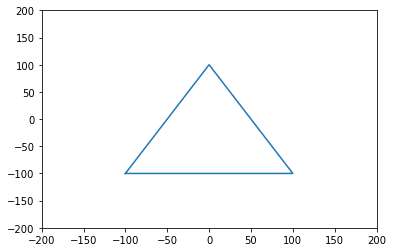

In [7]:
A = [
[-100, -100, 1],
[0, 100, 1],
[100, -100, 1],
[-100, -100, 1]
]

A = np.array(A)

x = A[:,0]
y = A[:,1]
plt.plot(x, y)
plt.ylim([-200, 200])
plt.xlim([-200, 200]) 

При помощи матричных операций выполните:
- Масштабирование и смещение объекта (применить 2 матрицы трансформаций). Масштабирование на (0.5, 1.2) и смещение на (200, 300)


In [8]:
scaler = np.array([[0.5, 0, 0],
                   [0, 1.2, 0],
                   [0, 0, 1]])

(-200.0, 200.0)

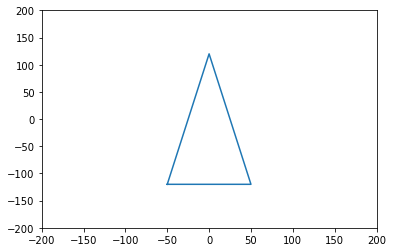

In [9]:
A_scaled = A @ scaler

x = A_scaled[:,0]
y = A_scaled[:,1]
plt.plot(x, y)
plt.ylim([-200, 200])
plt.xlim([-200, 200])

In [10]:
shifter = [[200, 300, 0]]

(-200.0, 420.0)

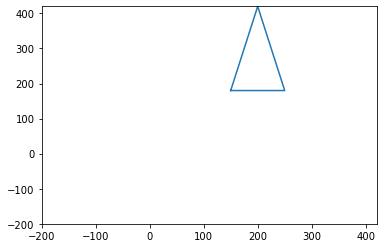

In [11]:
A_shifted = A_scaled + shifter

x = A_shifted[:,0]
y = A_shifted[:,1]
plt.plot(x, y)
plt.ylim([-200, np.max(A_shifted)])
plt.xlim([-200, np.max(A_shifted)])

## Задание 3


Найдите собственные значения и собственные вектора матрицы:

In [12]:
m = np.array([[1, 4],
              [1, 1]])
print(m)

[[1 4]
 [1 1]]


In [13]:
eigenvalues, eigenvectors = np.linalg.eig(m)

In [14]:
print(f'Собственные значения: {eigenvalues}')
print(f'Собственные векторы: {eigenvectors}')

Собственные значения: [ 3. -1.]
Собственные векторы: [[ 0.89442719 -0.89442719]
 [ 0.4472136   0.4472136 ]]


## Задание 4


Дана функция с неизвестными параметрами a и b, вам также известны значения функции `fx` в точках `x`. 

Найдите оптимальные параметры a, b, минимизирующие абсолютную ошибку `error`.


In [15]:
def f(x, a, b):
    return np.e**a * np.sin(b*x) + x

In [16]:
x = np.array([0.        , 0.26315789, 0.52631579, 0.78947368, 1.05263158,
              1.31578947, 1.57894737, 1.84210526, 2.10526316, 2.36842105,
              2.63157895, 2.89473684, 3.15789474, 3.42105263, 3.68421053,
              3.94736842, 4.21052632, 4.47368421, 4.73684211, 5.        ])

fx = np.array([  0.        , -12.01819092, -18.90968634, -17.68786571,
                -8.7529108 ,   4.27524517,  16.06801336,  21.81250213,
                19.22059845,   9.48411207,  -3.22273056, -13.48576488,
               -16.91096359, -11.95866834,  -0.58630088,  12.56873816,
                22.12489421,  24.20292139,  18.04522521,   6.33211092])

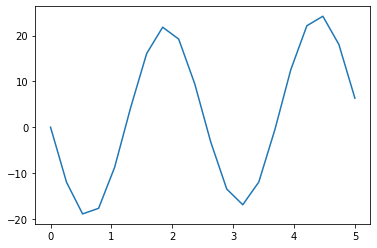

In [17]:
plt.plot(x, fx)
plt.show()

In [18]:
def error(params):
    return np.sum(np.abs(fx - f(x, params[0], params[1])))

In [19]:
bounds = [(-10, 10), (-10, 10)]

result = differential_evolution(error, bounds, seed=42)
result

     fun: 1.5130289208187264e-06
 message: 'Optimization terminated successfully.'
    nfev: 2073
     nit: 66
 success: True
       x: array([ 3. , -2.5])

In [20]:
y = f(x, result.x[0], result.x[1])

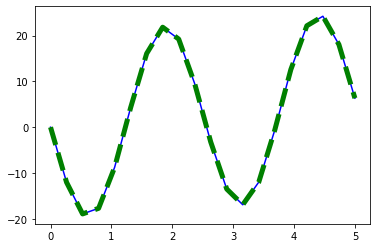

In [21]:
plt.plot(x, fx, color='blue')
plt.plot(x, y, color='green', linestyle = '--', linewidth = 5)
plt.show()

## Задание 5



Дана матрица рейтингов фильмов (строки - пользователи (10 человек), столбцы - фильмы (15 фильмов))

In [22]:
ratings = np.array([[ 4,  4,  9,  4,  1,  6, 10,  7,  9,  6,  9,  2,  8,  6,  6],
                     [ 9,  2,  5, 10,  7,  8, 10,  5,  6,  2,  1,  6,  8,  9,  7],
                     [ 1,  6,  8,  8,  4,  9,  3,  8, 10,  5,  2,  6,  8,  1,  6],
                     [ 6,  1,  9,  7,  7,  9,  2,  3,  5,  1,  6,  6,  3,  2,  7],
                     [ 3,  7,  3,  5,  7,  9,  9,  6,  2,  9,  1,  2,  8, 10,  6],
                     [ 8,  3,  7,  3,  8,  6,  1,  8,  8,  6,  1,  9,  4, 10,  1],
                     [ 9,  8,  4,  8,  8, 10,  6,  1,  1,  2,  9,  5,  2,  7,  2],
                     [ 4,  1,  6,  4,  3, 10,  4,  4,  2,  8,  7,  9,  3,  8,  3],
                     [ 2,  7,  7,  6, 10,  6,  8,  9,  8,  6, 10,  1,  7, 10,  4],
                     [ 5, 10,  8,  8,  9,  7,  2,  9,  9, 10,  8,  8,  8,  6, 10]])

Необходимо найти наиболее похожего пользователя по косинусной метрике для каждого из пользователей (ответ: 10 пар вида (x, y), где y - наиболее похожий пользователь на пользователя x).

In [23]:
def cosine(a, b):
    """
    Подсчет косинуса угла между векторами a, b по их координатам
    """
    # длины векторов
    aLength = np.linalg.norm(a)
    bLength = np.linalg.norm(b)
    
    return np.dot(a, b) / (aLength * bLength)

In [24]:
ratings_matches = {}
array_matches = {}

for user_main_loop, ratings_main_loop in enumerate(ratings, 1):
    best_cosine = int()
    
    for user_sub_loop, ratings_sub_loop in enumerate(ratings, 1):
        cos = cosine(ratings_sub_loop, ratings_main_loop)
        if (user_main_loop != user_sub_loop) and (cos > best_cosine):
            best_cosine = cos
            ratings_matches[user_main_loop] = user_sub_loop
            array_matches[str(ratings_main_loop)] = ratings_sub_loop
            
ratings_matches

{1: 9, 2: 5, 3: 10, 4: 10, 5: 9, 6: 10, 7: 4, 8: 6, 9: 1, 10: 3}

In [25]:
array_matches

{'[ 4  4  9  4  1  6 10  7  9  6  9  2  8  6  6]': array([ 2,  7,  7,  6, 10,  6,  8,  9,  8,  6, 10,  1,  7, 10,  4]),
 '[ 9  2  5 10  7  8 10  5  6  2  1  6  8  9  7]': array([ 3,  7,  3,  5,  7,  9,  9,  6,  2,  9,  1,  2,  8, 10,  6]),
 '[ 1  6  8  8  4  9  3  8 10  5  2  6  8  1  6]': array([ 5, 10,  8,  8,  9,  7,  2,  9,  9, 10,  8,  8,  8,  6, 10]),
 '[6 1 9 7 7 9 2 3 5 1 6 6 3 2 7]': array([ 5, 10,  8,  8,  9,  7,  2,  9,  9, 10,  8,  8,  8,  6, 10]),
 '[ 3  7  3  5  7  9  9  6  2  9  1  2  8 10  6]': array([ 2,  7,  7,  6, 10,  6,  8,  9,  8,  6, 10,  1,  7, 10,  4]),
 '[ 8  3  7  3  8  6  1  8  8  6  1  9  4 10  1]': array([ 5, 10,  8,  8,  9,  7,  2,  9,  9, 10,  8,  8,  8,  6, 10]),
 '[ 9  8  4  8  8 10  6  1  1  2  9  5  2  7  2]': array([6, 1, 9, 7, 7, 9, 2, 3, 5, 1, 6, 6, 3, 2, 7]),
 '[ 4  1  6  4  3 10  4  4  2  8  7  9  3  8  3]': array([ 8,  3,  7,  3,  8,  6,  1,  8,  8,  6,  1,  9,  4, 10,  1]),
 '[ 2  7  7  6 10  6  8  9  8  6 10  1  7 10  4]': array([ 4,  4,  9, 